In [1]:
import sys
sys.path.append("../")
import os
import pickle as pkl
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns
import matplotlib.pyplot as plt


from coh_tools import *
from get_data import *

In [3]:
#dataframes = get_dataframes("/home/julien/school/lab/opto_data_analysis", 
#                     "/mnt/hdd2tb/lab/elife/data", only_paired=False,
#                     skip_short=True, scale_PCA=False)

# dataframes = get_dataframes("C:/Users/julienb/lab/opto_data_analysis", "C:/Users/julienb/lab/data", only_paired=False,
#                              skip_short=True, scale_PCA=False, get_cond=False)

dataframes = get_dataframes("/home/julien/lab/opto_data_analysis", 
                    "/media/julien/easystore/lab/elife/data", only_paired=False,
                    skip_short=True, scale_PCA=False)

theta
beta
gamma
high_gamma


In [4]:
dataframes["theta"].shape

(1250140, 50)

In [23]:
for band in ["theta", "beta", "gamma", "high_gamma"]:
    dataframes[band]["Las1_distance_to_closer"] = dataframes[band][["Distance_to_A1", "Distance_to_B1"]].min(axis=1)    
    dataframes[band]["Las1_distance_to_further"] = dataframes[band][["Distance_to_A1", "Distance_to_B1"]].max(axis=1)    
    dataframes[band]["Las2_distance_to_closer"] = dataframes[band][["Distance_to_A2", "Distance_to_B2"]].min(axis=1)    
    dataframes[band]["Las2_distance_to_further"] = dataframes[band][["Distance_to_A2", "Distance_to_B2"]].max(axis=1)    
                                                           

In [5]:
for band in ["theta", "beta", "gamma", "high_gamma"]:
    dataframes[band]["Las1_distance_to_closer"] = dataframes[band][["Distance_to_A1", "Distance_to_A2"]].min(axis=1)    
    dataframes[band]["Las1_distance_to_further"] = dataframes[band][["Distance_to_A1", "Distance_to_A2"]].max(axis=1)    
    dataframes[band]["Las2_distance_to_closer"] = dataframes[band][["Distance_to_B1", "Distance_to_B2"]].min(axis=1)    
    dataframes[band]["Las2_distance_to_further"] = dataframes[band][["Distance_to_B2", "Distance_to_B2"]].max(axis=1)    
                                                           

In [6]:
for band in dataframes.keys():
    dataframes[band] = dataframes[band][dataframes[band]["In_upper_triangle"] == 1]
    dataframes[band] = dataframes[band].drop(columns=["On_diagonal", "In_upper_triangle", "Num_lasers"])


In [7]:
dataframes["theta"]["Experiment_block_key"].unique()

array(['MonkeyG_20150911_Session7_S1', 'MonkeyG_20150914_Session1_S1',
       'MonkeyG_20150914_Session3_S1', 'MonkeyG_20150915_Session2_S1',
       'MonkeyG_20150915_Session3_S1', 'MonkeyG_20150915_Session4_S1',
       'MonkeyG_20150915_Session5_S1', 'MonkeyG_20150916_Session4_S1',
       'MonkeyG_20150917_Session1_M1', 'MonkeyG_20150917_Session1_S1',
       'MonkeyG_20150917_Session2_M1', 'MonkeyG_20150917_Session2_S1',
       'MonkeyG_20150917_Session3_M1', 'MonkeyG_20150917_Session3_S1',
       'MonkeyG_20150918_Session1_M1', 'MonkeyG_20150918_Session1_S1',
       'MonkeyG_20150921_Session3_S1', 'MonkeyG_20150921_Session5_S1',
       'MonkeyG_20150922_Session1_S1', 'MonkeyG_20150922_Session2_S1',
       'MonkeyG_20150922_Session3_S1', 'MonkeyG_20150925_Session1_S1',
       'MonkeyG_20150925_Session2_S1', 'MonkeyJ_20160426_Session1_S1',
       'MonkeyJ_20160426_Session2_S1', 'MonkeyJ_20160426_Session3_S1',
       'MonkeyJ_20160428_Session2_S1', 'MonkeyJ_20160428_Session3_S1',
      

In [8]:
for bad_session in ["MonkeyG_20150918_Session1_M1", "MonkeyG_20150918_Session1_S1", 
                    "MonkeyG_20150917_Session1_M1", "MonkeyG_20150917_Session2_M1",
                    "MonkeyG_20150917_Session3_M1"]:
    for band in dataframes.keys():
        dataframes[band] = dataframes[band][dataframes[band]["Experiment_block_key"] != bad_session]

In [9]:
dataframes["theta"]["Experiment_block_key"].unique()

array(['MonkeyG_20150911_Session7_S1', 'MonkeyG_20150914_Session1_S1',
       'MonkeyG_20150914_Session3_S1', 'MonkeyG_20150915_Session2_S1',
       'MonkeyG_20150915_Session3_S1', 'MonkeyG_20150915_Session4_S1',
       'MonkeyG_20150915_Session5_S1', 'MonkeyG_20150916_Session4_S1',
       'MonkeyG_20150917_Session1_S1', 'MonkeyG_20150917_Session2_S1',
       'MonkeyG_20150917_Session3_S1', 'MonkeyG_20150921_Session3_S1',
       'MonkeyG_20150921_Session5_S1', 'MonkeyG_20150922_Session1_S1',
       'MonkeyG_20150922_Session2_S1', 'MonkeyG_20150922_Session3_S1',
       'MonkeyG_20150925_Session1_S1', 'MonkeyG_20150925_Session2_S1',
       'MonkeyJ_20160426_Session1_S1', 'MonkeyJ_20160426_Session2_S1',
       'MonkeyJ_20160426_Session3_S1', 'MonkeyJ_20160428_Session2_S1',
       'MonkeyJ_20160428_Session3_S1', 'MonkeyJ_20160429_Session1_S1',
       'MonkeyJ_20160429_Session3_S1', 'MonkeyJ_20160502_Session1_S1',
       'MonkeyJ_20160624_Session3_S1', 'MonkeyJ_20160624_Session4_S1',
      

In [10]:
dataframes["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'Distance_to_A1', 'Distance_to_B1', 'Distance_to_A2', 'Distance_to_B2',
       'PC1a_mean', 'PC2a_mean', 'PC1b_mean', 'PC2b_mean', 'PC1a_sd',
       'PC2a_sd', 'PC1b_sd', 'PC2b_sd', 'From_electrodes', 'To_electrodes',
       'Initial_coh_sd', 'Cond_coh_sd', 'Coh_diff_sd', 'Coh_sum_sd',
       'Coh_diff_avg', 'Coh_sum_mag', 'Pair_avg_net_coh',
       'Pair_avg_net_coh_sd', 'Graph_avg_net_coh', 'Graph_avg_net_coh_sd',
       'Elec_cov', 'Time_cov', 'Avg_coh_to_stim', 'Avg_diff_1-2_stim',
       'Avg_stim_diff_btw_elec', 'End_diff', 'Delays', 'Monkeys', 'Block_num',
       'Experiment_block_key', 'Both_M1', 'Both_S1', 'cond_diff_Y',
       'cond_diff_percent_Y', 'diff_Y', 'diff_percent_Y', 'Is_stim_site_1',
       'Is_stim_site_2', 'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further'],
      dtype='object')

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
dataframes["theta"].head()

Initial_coh  Distance  Coh_proj  Coh_proj_sd     Phase  Distance_to_A1  \
1     0.853664  1.000000  0.663200    20.549061  0.079096        7.071068   
2     0.761719  3.000000  0.606193    19.373642  0.215161        7.071068   
3     0.896571  1.000000  0.678290    21.428839  0.009852        7.071068   
4     0.759635  1.414214  0.604673    19.484394  0.211300        7.071068   
5     0.882073  2.236068  0.675688    21.223001  0.025951        7.071068   

   Distance_to_B1  Distance_to_A2  Distance_to_B2  PC1a_mean  PC2a_mean  \
1             9.0        6.403124        9.055385  -0.044575    0.00615   
2             9.0        5.385165        9.486833  -0.044575    0.00615   
3             9.0        6.403124        8.000000  -0.044575    0.00615   
4             9.0        5.656854        8.062258  -0.044575    0.00615   
5             9.0        5.000000        8.246211  -0.044575    0.00615   

   PC1b_mean  PC2b_mean   PC1a_sd   PC2a_sd   PC1b_sd   PC2b_sd  \
1  -0.134348  -0.887503  2.023576  0.510766  1.362675  0.375053   
2   0.577899  -1.173354  2.023576  0.510766  1.358351  0.256986   
3  -0.451121  -0.251288  2.023576  0.510766  1.407406  0.491174   
4   0.602079  -1.177946  2.023576  0.510766  1.387869  0.265632   
5  -0.375065  -0.452768  2.023576  0.510766  1.386117  0.444066   

   From_electrodes  To_electrodes  Initial_coh_sd  Cond_coh_sd  Coh_diff_sd  \
1                1              2        0.166378     0.211477     0.109582   
2                1              4        0.153003     0.190082     0.116222   
3                1              5        0.179762     0.267833     0.095633   
4                1              6        0.155108     0.187472     0.117688   
5                1              7        0.183436     0.236855     0.100920   

   Coh_sum_sd  Coh_diff_avg  Coh_sum_mag  Pair_avg_net_coh  \
1    0.302247      0.126379     1.610694          1.587612   
2    0.288861      0.201251     1.549721          1.527625   
3    0.328274      0.056040     1.618270          1.594289   
4    0.290827      0.201217     1.547561          1.525157   
5    0.319547      0.073914     1.618187          1.594715   

   Pair_avg_net_coh_sd  Graph_avg_net_coh  Graph_avg_net_coh_sd  Elec_cov  \
1             0.321211           0.769401              0.136096  0.011814   
2             0.308905           0.769401              0.136096  0.005115   
3             0.340952           0.769401              0.136096  0.016780   
4             0.311186           0.769401              0.136096  0.005132   
5             0.334636           0.769401              0.136096  0.015460   

   Time_cov  Avg_coh_to_stim  Avg_diff_1-2_stim  Avg_stim_diff_btw_elec  \
1  0.033197         0.768817          -0.070974                0.112255   
2  0.024563         0.715396          -0.078439                0.208390   
3  0.040502         0.804676          -0.058104                0.049986   
4  0.024999         0.714353          -0.077711                0.207278   
5  0.038311         0.794273          -0.061319                0.063231   

   End_diff  Delays Monkeys  Block_num          Experiment_block_key  Both_M1  \
1 -0.343879    30.0       G        1.0  MonkeyG_20150911_Session7_S1      1.0   
2 -0.363309    30.0       G        1.0  MonkeyG_20150911_Session7_S1      1.0   
3 -0.524121    30.0       G        1.0  MonkeyG_20150911_Session7_S1      1.0   
4 -0.349896    30.0       G        1.0  MonkeyG_20150911_Session7_S1      1.0   
5 -0.548798    30.0       G        1.0  MonkeyG_20150911_Session7_S1      1.0   

   Both_S1  cond_diff_Y  cond_diff_percent_Y    diff_Y  diff_percent_Y  \
1      0.0    -0.142256            -0.166642 -0.501612       -0.587599   
2      0.0    -0.112122            -0.147196 -0.424666       -0.557509   
3      0.0    -0.182005            -0.203001 -0.555028       -0.619056   
4      0.0    -0.112422            -0.147995 -0.424868       -0.559305   
5      0.0    -0.136175            -0.154381 -0.511773       -0.580

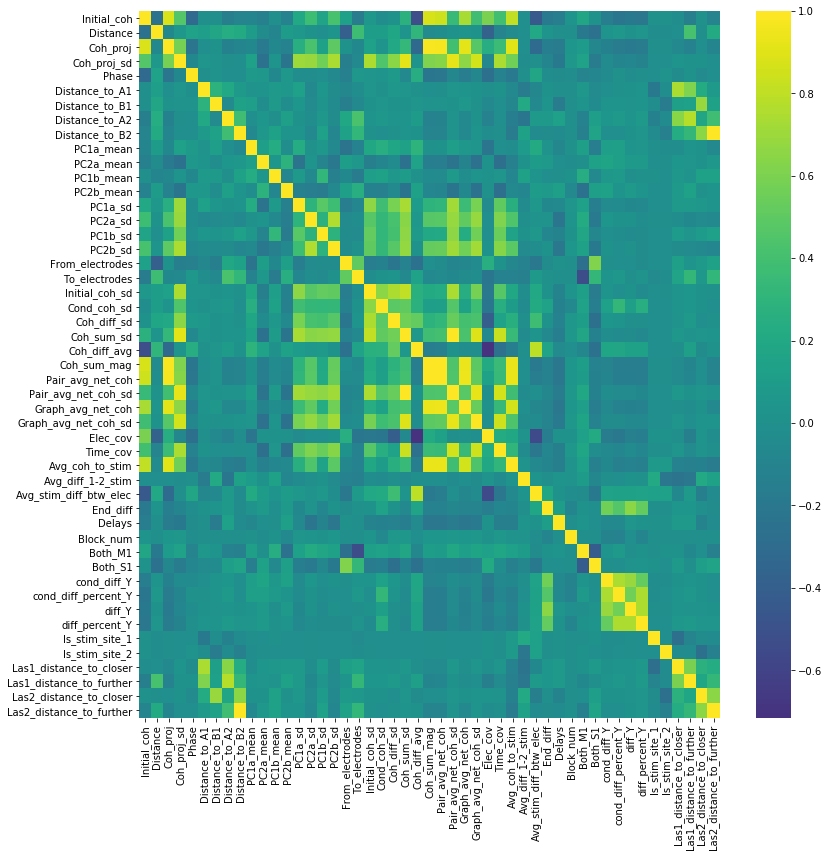

In [13]:
plt.figure(figsize=(13, 13))
sns.heatmap(dataframes["theta"].corr(), cmap="viridis", center=0)

In [14]:
for band in ["theta", "beta", "gamma", "high_gamma"]:
    #dataframes[band].rename(columns={"Coh_diff_mag": "Coh_diff_avg"}, inplace=True)
    dataframes[band] = dataframes[band].drop(columns = ['Distance_to_A1', 'Distance_to_B1', 'Distance_to_A2', 'Distance_to_B2',
                                                       'Coh_sum_mag', 'Coh_sum_sd', 'PC1a_mean', 'PC2a_mean', 'PC1b_mean', 
                                                        'PC2b_mean', 'PC1a_sd', 'PC2a_sd', 'PC1b_sd', 'PC2b_sd',
                                                       'Cond_coh_sd', 'Avg_diff_1-2_stim'])

In [15]:
# if during-stim data

#for band in ["theta", "beta", "gamma", "high_gamma"]:    
#    dataframes[band] = dataframes[band].drop(columns = ['cond_diff_Y', 'cond_diff_percent_Y'])

In [16]:
dataframes["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
       'Coh_diff_avg', 'Pair_avg_net_coh', 'Pair_avg_net_coh_sd',
       'Graph_avg_net_coh', 'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov',
       'Avg_coh_to_stim', 'Avg_stim_diff_btw_elec', 'End_diff', 'Delays',
       'Monkeys', 'Block_num', 'Experiment_block_key', 'Both_M1', 'Both_S1',
       'cond_diff_Y', 'cond_diff_percent_Y', 'diff_Y', 'diff_percent_Y',
       'Is_stim_site_1', 'Is_stim_site_2', 'Las1_distance_to_closer',
       'Las1_distance_to_further', 'Las2_distance_to_closer',
       'Las2_distance_to_further'],
      dtype='object')

In [17]:
pkl.dump(dataframes, open("/home/julien/lab/data/opto_data/processed_optodata_15jul20.pkl", "wb"))